# Setup Freyberg pilot points to use regularization and see what happens...

### With our first attempt at pilot points, we saw bad things.  So lets see if we can fix the problem by using regularization.

Recall from Anderson et al. (2015) regularization adds an additional term to our total objective function:

<img src="tik-reg_eq9.9.png" style="float: center">

The first term to the right of the equals sign is the measurement objective function from
Eqn (9.6), which is calculated as the sum of squared weighted residuals, where *n* residuals,
*ri*, are calculated from hard knowledge and wi are their respective weights. The second
term quantifies the penalty resulting from deviations from soft knowledge as the sum
of *q* deviations from *j* soft knowledge conditions *fj*, where *fj* is a function of model parameters
*p*. 

## A calibrated model, therefore, is found by minimizing both the measurement objective function (hard data) and the soft knowledge penalty.


### Let's see how to do this in PEST


In [1]:
%matplotlib inline
import os, shutil
import sys
sys.path.append("..")
import numpy as np
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt

import flopy as flopy
import pyemu

In [2]:
import freyberg_setup as fs
fs.setup_pest_pp()
working_dir = fs.WORKING_DIR_PP
pst_name = fs.PST_NAME_PP


changing model workspace...
   freyberg_pp
FloPy is using the following  executable to run the model: /Users/mnfienen/Documents/GIT/GW1876/activities/freyberg_pilot_points_2/freyberg_pp/mfnwt

                                  MODFLOW-NWT-SWR1 
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUNDWATER-FLOW MODEL
                             WITH NEWTON FORMULATION
                             Version 1.1.4 4/01/2018                         
                    BASED ON MODFLOW-2005 Version 1.12.0 02/03/2017                       

                    SWR1 Version 1.04.0 09/15/2016                       

 Using NAME file: freyberg.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2018/10/21 22:26:43

 Solving:  Stress period:     1    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     2    Time step:     1    Groundwater-Flow Eqn.
 Solving:  Stress period:     3    Time step:     1    Groundwater-Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 20

/Users/mnfienen/Documents/GIT/pyemu/pyemu/utils/gw_utils.py:1607: PyemuWarning: Flow out (flout) of grouped segments will be aggregated... 
  warnings.warn("Flow out (flout) of grouped segments will be aggregated... ", PyemuWarning)


writing 'sfr_obs.config' to sfr_obs.config
                                    obsnme     obsval  weight    obgnme
c001fr05c04_19791231  c001fr05c04_19791231  29.135645     0.0  forehead
c001fr16c17_19791231  c001fr16c17_19791231  21.775225     0.0  forehead
starting interp point loop for 800 points
took 3.730809 seconds
noptmax: 0
noptmax: 8


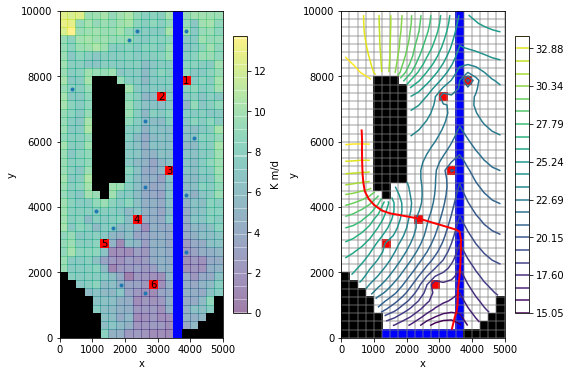

In [3]:
fs.plot_model(working_dir, pst_name)

## Okay, we have a running PEST setup and model to work with - let's use a shortcut variable to tell pyemu that we want interrogate or look at this particular model.... 

In [4]:
pst = pyemu.Pst(os.path.join(working_dir,pst_name))

## In the ``intro_to_regularization``, we talked about two common forms of Tikhonov regularization.  Here we will add both types to the control file.  

### First, let's add a few preferred value equations for the recharge and well flux parameters.  First, let's use pyemu to tell us what parameter groups are in our PEST control file:

In [5]:
# echo out what parameter groups are in the PEST control file
pst.parameter_data.pargp.unique()

array(['hk', 'porosity', 'rch', 'sfr', 'w0', 'w1'], dtype=object)

### See the pst at the beginning of the line of code?  That is the variable we defined above that has the PEST control file specified.  That is how pyemu knows which model to report on.

### Even more power than echoing out what is in the PEST files, we can use pyemu to add preferred value regularization equations to the recharge and well parameter groups.  Note though, pyemu doesn't call it "preferred value"! Rather, it uses the mathematical term "Zero Order Tikhonov" so we have to use that.

In [6]:
# use pyemu to apply preferred value (aka zero order Tikhonov) to the parameters at the end
pyemu.helpers.zero_order_tikhonov(pst,par_groups=["rch","w0","w1"])

### Note that only recharge and well parameters were regularized (i.e., the ones listed at the end of the line of code).

##### Let's see how the preferred value equation looks:

In [7]:
pst.prior_information

,pilbl,equation,obgnme,weight
pilbl,,,,
rch_0,rch_0,1.0 * log(rch_0) = 0.000000E+00,regulrch,1.660964
rch_1,rch_1,1.0 * log(rch_1) = 0.000000E+00,regulrch,0.926628
w0_r09_c16,w0_r09_c16,1.0 * log(w0_r09_c16) = 0.000000E+00,regulw0,1.660964
w0_r11_c13,w0_r11_c13,1.0 * log(w0_r11_c13) = 0.000000E+00,regulw0,1.660964
w0_r20_c14,w0_r20_c14,1.0 * log(w0_r20_c14) = 0.000000E+00,regulw0,1.660964
w0_r26_c10,w0_r26_c10,1.0 * log(w0_r26_c10) = 0.000000E+00,regulw0,1.660964
w0_r29_c06,w0_r29_c06,1.0 * log(w0_r29_c06) = 0.000000E+00,regulw0,1.660964
w0_r34_c12,w0_r34_c12,1.0 * log(w0_r34_c12) = 0.000000E+00,regulw0,1.660964
w1_r09_c16,w1_r09_c16,1.0 * log(w1_r09_c16) = 0.000000E+00,regulw1,0.500000


## RECALL:  This report does not mean that the PEST control file has been updated! It is simply reporting what is in pyemu's memory block.


### Now, let's add preferred difference regularization to the spatially distributed parameters.  Note that preferred value only needed one parameter (the value of that parameter).  A preferred difference regularization constraint involves 2 parameters.  But the spatial distance between any two parameters is not the same - how do we deal?  With  geostatistics! 

In [8]:
v = pyemu.geostats.ExpVario(contribution=1.0,a=2500.0)
gs = pyemu.geostats.GeoStruct(variograms=v,nugget=0.0)
df_pp = pyemu.pp_utils.pp_tpl_to_dataframe(os.path.join(working_dir,"hkpp.dat.tpl"))
cov = gs.covariance_matrix(df_pp.x,df_pp.y,df_pp.parnme)
pyemu.helpers.first_order_pearson_tikhonov(pst,cov,reset=False,abs_drop_tol=0.1)
pst.prior_information

,pilbl,equation,obgnme,weight
pilbl,,,,
rch_0,rch_0,1.0 * log(rch_0) = 0.000000E+00,regulrch,1.660964
rch_1,rch_1,1.0 * log(rch_1) = 0.000000E+00,regulrch,0.926628
w0_r09_c16,w0_r09_c16,1.0 * log(w0_r09_c16) = 0.000000E+00,regulw0,1.660964
w0_r11_c13,w0_r11_c13,1.0 * log(w0_r11_c13) = 0.000000E+00,regulw0,1.660964
w0_r20_c14,w0_r20_c14,1.0 * log(w0_r20_c14) = 0.000000E+00,regulw0,1.660964
w0_r26_c10,w0_r26_c10,1.0 * log(w0_r26_c10) = 0.000000E+00,regulw0,1.660964
w0_r29_c06,w0_r29_c06,1.0 * log(w0_r29_c06) = 0.000000E+00,regulw0,1.660964
w0_r34_c12,w0_r34_c12,1.0 * log(w0_r34_c12) = 0.000000E+00,regulw0,1.660964
w1_r09_c16,w1_r09_c16,1.0 * log(w1_r09_c16) = 0.000000E+00,regulw1,0.500000


### Note that the preferred difference = 0, which means our preferred difference regularization is really a preferred *homogeneity* condition!



### Okay, getting close.  Some housekeeping - we need to change PEST's estimation mode from "estimation" to "regularization".  

In [9]:
pst.control_data.pestmode = "regularization"

## And, most importantly we need to see what pyemu has for the all important regularization BIG KNOB, the target objective function - or ``phimlim``.  This is THE ONE INPUT that tells PEST how regularization is enforced.  So let's use pyemu to see what our control file has for ``phimlim``.  

In [10]:
# for the PEST control file defined by pst above, echo out phimlim
pst.reg_data.phimlim

'1.0e-10'

### That's no good - way too low for a final parameter estimation.  But recall our workflow from the Intro to Regularization workbook.  Thisd is just a "placeholder" value to ignore soft knowledge and only focus on the best fit.  After the how-low-can-PEST-go run, ``phimlim`` should be set to a larger number, say the number of non-zero weighted obs.  Here we'll explore the effect of ``phimlim`` a bit.  We saw in the unregularized pilot point run, are best ``phi`` was about 120, so let's try doubling that to 240 (just a guess)

In [11]:
# use pyemu to set the phimlim to 240
pst.reg_data.phimlim = 240
# when phimlim changes so should phimaccept, and is usually 5-10% higher than phimlim
pst.reg_data.phimaccept = 260
#pst.svd_data.maxsing = 3

### Now we're ready to write all the information that pyemu has in memory to the PEST control file....

In [12]:
pst.write(os.path.join(working_dir,pst_name))

noptmax: 8


### You can look at the file we just wrote by opening freyberg_pp.pst in the freyberg_pp directory, but here we'll plunge on.  Let's run it - this will again take a little time, watch the run in the terminal window that launched the notebook....

In [13]:
os.chdir(working_dir)
pyemu.os_utils.start_slaves('.',"pestpp",pst_name,num_slaves=15,master_dir='.')
os.chdir("..")

## Okay - let's look at how we did

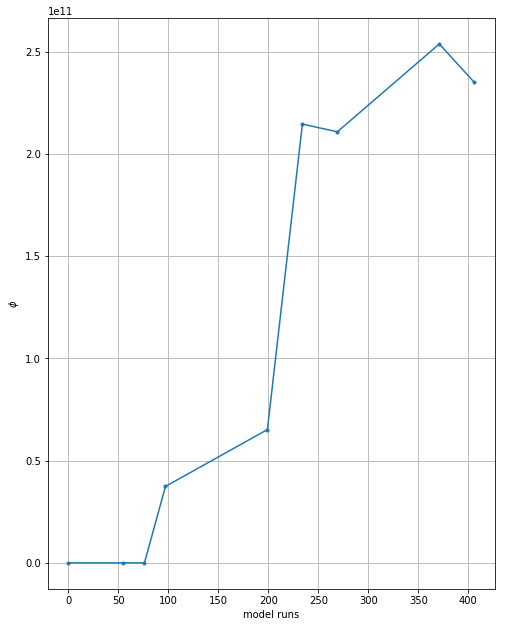

In [14]:
# plot the reduction of phi by model runs
pst.plot(kind="phi_progress")

In [15]:
# report the final phi for the PEST run defined in pst
pst.phi

199.88059652179339

[<Figure size 576x756 with 0 Axes>, <Figure size 576x756 with 8 Axes>]

<Figure size 576x756 with 0 Axes>

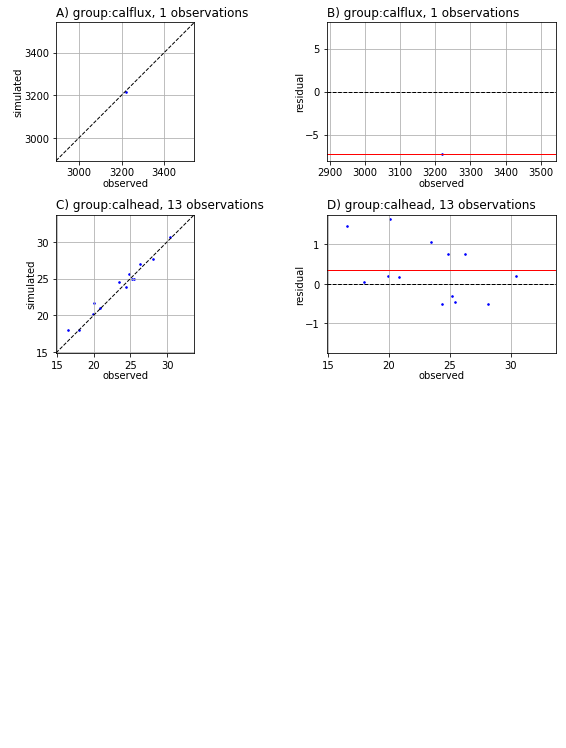

In [16]:
# plot the results
pst.plot(kind="1to1")

### Let's see how the parameter values look.  First, let's take the optimal parameter values from our run and put them through fac2real to make arrays....

In [17]:
os.chdir(working_dir)
pst.parrep(pst_name.replace(".pst",".parb"))
pst.write_input_files()
pyemu.geostats.fac2real("hkpp.dat",factors_file="hkpp.dat.fac",out_file="hk_layer_1.ref")
os.chdir("..")

## Now let's plot it

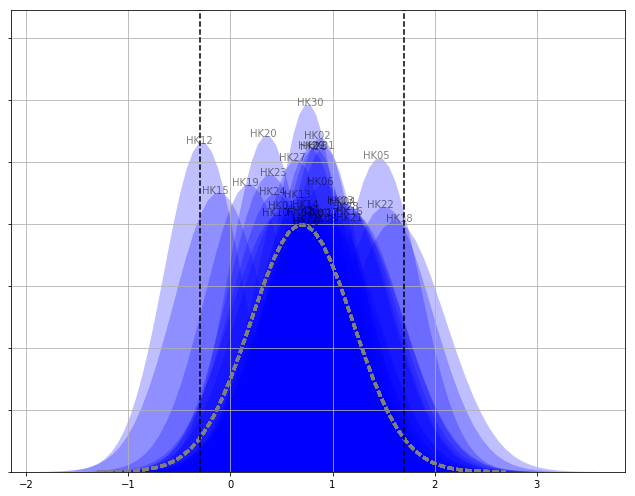

In [18]:
df_paru = pd.read_csv(os.path.join(working_dir,pst_name.replace(".pst",".par.usum.csv")),index_col=0)

hk_pars = [p.upper() for p in pst.par_names if p.startswith("hk")]
df_hk = df_paru.loc[hk_pars,:]
ax = pyemu.plot_utils.plot_summary_distributions(df_hk,label_post=True)
mn = np.log10(pst.parameter_data.loc[hk_pars[0].lower(),"parlbnd"])
mx = np.log10(pst.parameter_data.loc[hk_pars[0].lower(),"parubnd"])
ax.plot([mn,mn],ax.get_ylim(),"k--")
ax.plot([mx,mx],ax.get_ylim(),"k--")

### Not a good sign...lots of parameters are still at their bounds (dashed vertical black lines)...not as many, but still a lot of them.  Let's see what the optimal field look likes....

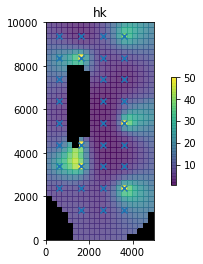

In [19]:
df_pp = pyemu.pp_utils.pp_tpl_to_dataframe(os.path.join(working_dir,"hkpp.dat.tpl"))
m = flopy.modflow.Modflow.load(fs.MODEL_NAM,model_ws=working_dir)
ax = m.upw.hk[0].plot(colorbar=True,alpha=0.5)
ax.scatter(df_pp.x,df_pp.y,marker='x')

###  Hmm, let's plot the true field again

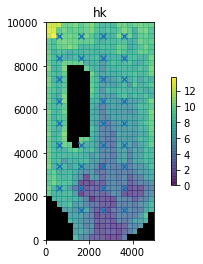

In [20]:
m.upw.hk[0] = os.path.join(fs.BASE_MODEL_DIR,"hk.truth.ref")
ax = m.upw.hk[0].plot(colorbar=True,alpha=0.5)
ax.scatter(df_pp.x,df_pp.y,marker='x')

## Oh no!!!!!  Better but we are still over fit...so let's back off the fit using ``phimilim``.  But first,  let's see how this overfit model did simulating the forecasts

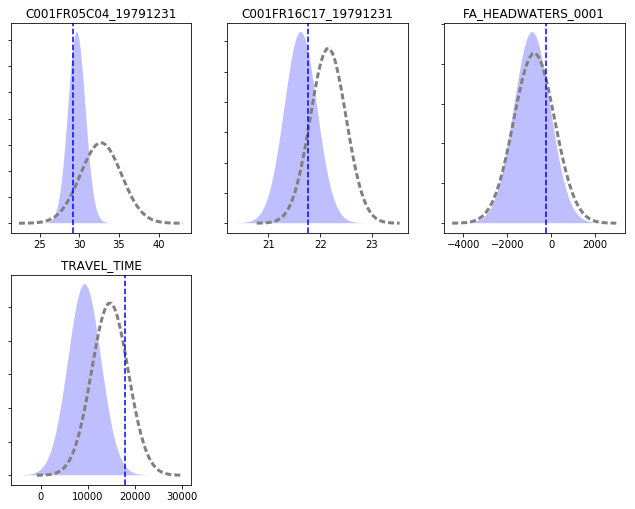

In [21]:
df_foreu = pd.read_csv(os.path.join(working_dir,pst_name.replace(".pst",".pred.usum.csv")),index_col=0)
figs, axes = pyemu.plot_utils.plot_summary_distributions(df_foreu,subplots=True)
for ax in axes:
    fname = ax.get_title().lower()
    ylim = ax.get_ylim()
    v = pst.observation_data.loc[fname,"obsval"]
    ax.plot([v,v],ylim,"b--")
    ax.set_ylim(ylim)

## We are doing well with the posterior uncertainty - the shaded area is thinner and higher than the grey dashed prior uncertainty for several forecasts. But, compared to the "truth" (vertical blue line), we are not doing well - the model is not reliable for all forecasts

# Adjust ``phimlim`` and rerun..

### Let's adjust the weights and ``phimlim`` based on how well we fit last time...and see if we can eliminate our overfitting problem.  How will we know we have eliminated it? In the real world, we will never know...

### Before changing, let's get a feel for what the model results look like with ``phimlim`` = 250.  So we said wanted our target objective function to be 250.  Where did it end up?  

In [22]:
pst.phi

199.88059652179339

## Pretty much where we should be, but our parameter fit was overfit. What does a Phi of around 250 look like for the observations? 

In [23]:
pst = pyemu.Pst(os.path.join(working_dir,pst_name))
pst.res.loc[pst.nnz_obs_names]

,name,group,measured,modelled,residual,weight
name,,,,,,
c001cr03c10_19700102,c001cr03c10_19700102,calhead,26.262615,27.001253,-0.738638,5.00
c001cr03c16_19700102,c001cr03c16_19700102,calhead,23.463532,24.522547,-1.059015,5.00
c001cr04c09_19700102,c001cr04c09_19700102,calhead,28.126832,27.606901,0.519931,5.00
c001cr10c02_19700102,c001cr10c02_19700102,calhead,30.430534,30.627172,-0.196638,5.00
c001cr14c11_19700102,c001cr14c11_19700102,calhead,25.442033,24.981920,0.460113,5.00
c001cr16c17_19700102,c001cr16c17_19700102,calhead,20.064206,21.693535,-1.629329,5.00
c001cr22c11_19700102,c001cr22c11_19700102,calhead,24.333130,23.811552,0.521578,5.00
c001cr23c16_19700102,c001cr23c16_19700102,calhead,19.950425,20.158253,-0.207828,5.00
c001cr25c05_19700102,c001cr25c05_19700102,calhead,24.844271,25.596397,-0.752126,5.00


## Okay, let's use pyemu to change PHIMLIM, let's double it to 500.  And the last line writes the new PEST control file. 

In [24]:
pst.reg_data.phimlim = 500.0
pst.reg_data.phimaccept = 550.0
pst.reg_data.fracphim = 0.75
pst.svd_data.maxsing = 3
pst.write(os.path.join(working_dir,pst_name))

noptmax: 8


##  You can look at the bottom of freyberg_pp.pst to see the change we made, but let's start the run....

In [25]:
os.chdir(working_dir)
pyemu.os_utils.start_slaves('.',"pestpp",pst_name,num_slaves=15,master_dir='.')
os.chdir("..")

## Let's look at Phi

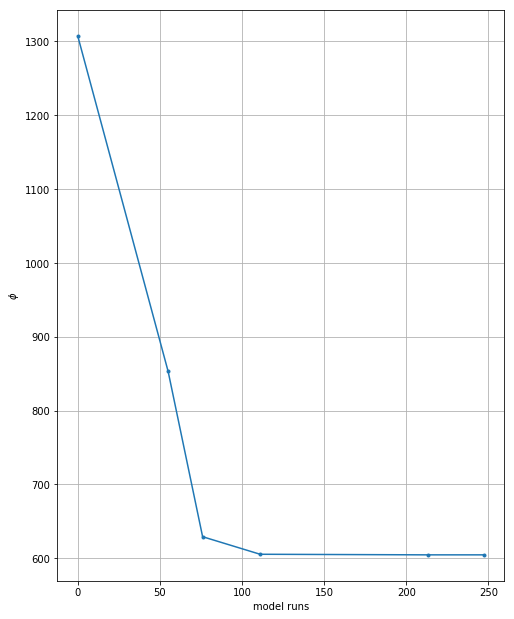

In [26]:
pst.plot(kind="phi_progress")

In [27]:
pst = pyemu.Pst(os.path.join(working_dir,pst_name))
pst.phi

604.70675707774376

[<Figure size 576x756 with 0 Axes>, <Figure size 576x756 with 8 Axes>]

<Figure size 576x756 with 0 Axes>

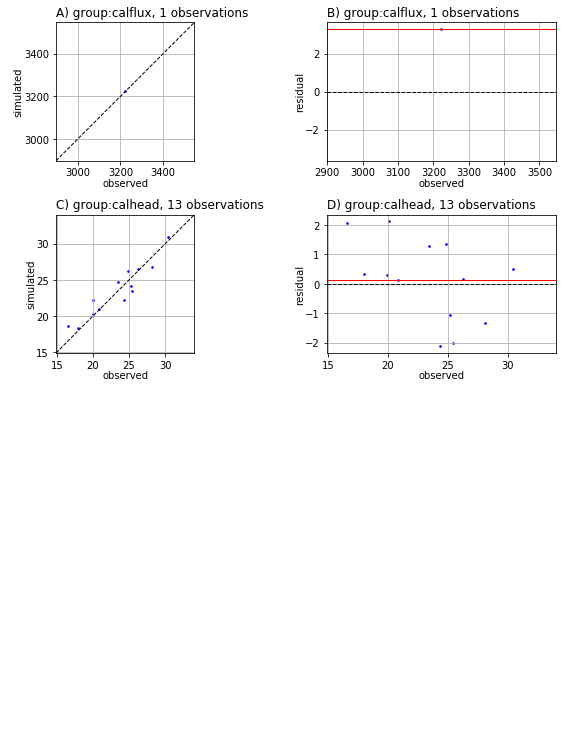

In [28]:
pst.plot(kind="1to1")

## Let's look at the K field again

In [29]:
os.chdir(working_dir)
pst.parrep(pst_name.replace(".pst",".parb"))
pst.write_input_files()
pyemu.geostats.fac2real("hkpp.dat",factors_file="hkpp.dat.fac",out_file="hk_layer_1.ref")
os.chdir("..")


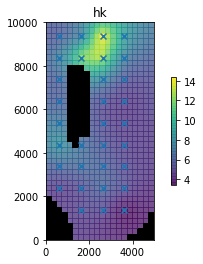

In [30]:
m = flopy.modflow.Modflow.load(fs.MODEL_NAM,model_ws=working_dir)
ax = m.upw.hk[0].plot(colorbar=True,alpha=0.5)
ax.scatter(df_pp.x,df_pp.y,marker='x')

## That's much better...let's compare it to the truth

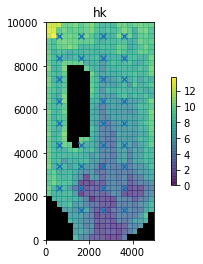

In [31]:
m.upw.hk[0] = os.path.join(fs.BASE_MODEL_DIR,"hk.truth.ref")
ax = m.upw.hk[0].plot(colorbar=True,alpha=0.5)
ax.scatter(df_pp.x,df_pp.y,marker='x')

## Now let's see how the uncertainty looks...

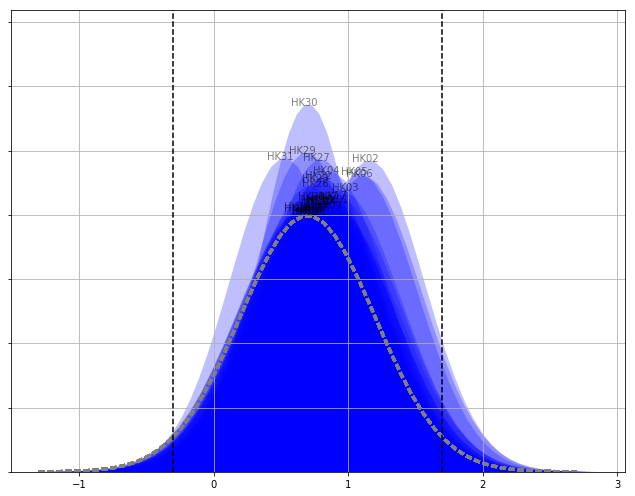

In [32]:
df_paru = pd.read_csv(os.path.join(working_dir,pst_name.replace(".pst",".par.usum.csv")),index_col=0)
hk_pars = [p.upper() for p in pst.par_names if p.startswith("hk")]
df_hk = df_paru.loc[hk_pars,:]
ax = pyemu.plot_utils.plot_summary_distributions(df_hk,label_post=True)
mn = np.log10(pst.parameter_data.loc[hk_pars[0].lower(),"parlbnd"])
mx = np.log10(pst.parameter_data.loc[hk_pars[0].lower(),"parubnd"])
ax.plot([mn,mn],ax.get_ylim(),"k--")
ax.plot([mx,mx],ax.get_ylim(),"k--")

## Ahhh yeah! Lot fewer pilot points at the bounds.  What about the forecasts?

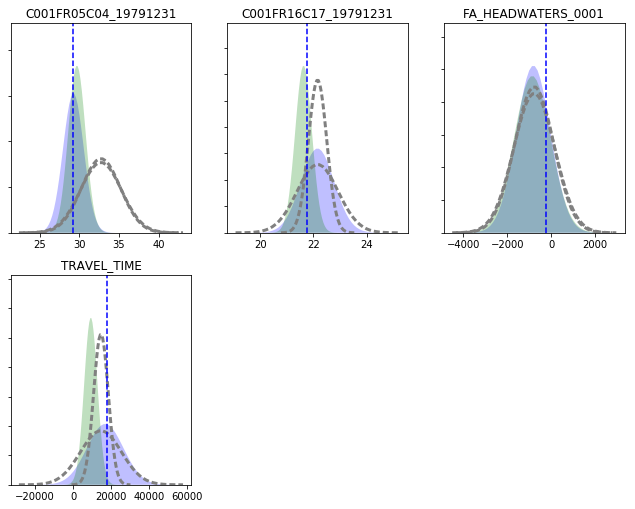

In [33]:
figs, axes = pyemu.plot_utils.plot_summary_distributions(os.path.join(working_dir,
                    pst_name.replace(".pst",".pred.usum.csv")),subplots=True)
for ax in axes:
    fname = ax.get_title()
    pyemu.plot_utils.plot_summary_distributions(df_foreu.loc[[fname],:],ax=ax,pt_color='g')
    fname = fname.lower()
    ylim = ax.get_ylim()
    v = pst.observation_data.loc[fname,"obsval"]
    ax.plot([v,v],ylim,"b--")
    ax.set_ylim(ylim)

##  Green shading is the previous run with PHIMLIM = 250; blue shading is the new run with PHIMLIM = 500.  The new run now brackets the "truth" with significant probability for most forecast (FINALLY!!!). So, even though we aren't fitting the observations as well, we are doing much better from a model forecast reliability stand point. 